#### Pandas Date Offsets and Rolling Window Functions - Part 86

This notebook covers important date offset classes like `BMonthEnd` and `BMonthBegin`, as well as rolling window statistical functions like correlation, covariance, skewness, and kurtosis.

In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BMonthEnd, BMonthBegin
from datetime import datetime

##### Date Offsets

### BMonthEnd and BMonthBegin

`BMonthEnd` is an alias for `BusinessMonthEnd` and `BMonthBegin` is an alias for `BusinessMonthBegin`. These are date offsets that represent the last and first business day of the month, respectively.

In [2]:
# Create BMonthEnd offset
bme = BMonthEnd()
print(f"BMonthEnd: {bme}")

# Create BMonthBegin offset
bmb = BMonthBegin()
print(f"BMonthBegin: {bmb}")

BMonthEnd: <BusinessMonthEnd>
BMonthBegin: <BusinessMonthBegin>


In [3]:
# Create a sample date
dt = datetime(2023, 1, 15)
print(f"Original date: {dt}")

Original date: 2023-01-15 00:00:00


In [4]:
# Apply BMonthEnd offset
next_bme = bme + dt
print(f"Next business month end: {next_bme}")

Next business month end: 2023-01-31 00:00:00


In [5]:
# Apply BMonthBegin offset
next_bmb = bmb + dt
print(f"Next business month begin: {next_bmb}")

Next business month begin: 2023-02-01 00:00:00


### rollforward() and rollback() Methods

Both `BMonthEnd` and `BMonthBegin` have `rollforward()` and `rollback()` methods that adjust dates to the next or previous offset date.

In [6]:
# Roll forward to the next business month end
rolled_forward_bme = bme.rollforward(dt)
print(f"Rolled forward to business month end: {rolled_forward_bme}")

Rolled forward to business month end: 2023-01-31 00:00:00


In [7]:
# Roll backward to the previous business month end
rolled_back_bme = bme.rollback(dt)
print(f"Rolled back to business month end: {rolled_back_bme}")

Rolled back to business month end: 2022-12-30 00:00:00


In [8]:
# Roll forward to the next business month begin
rolled_forward_bmb = bmb.rollforward(dt)
print(f"Rolled forward to business month begin: {rolled_forward_bmb}")

Rolled forward to business month begin: 2023-02-01 00:00:00


In [9]:
# Roll backward to the previous business month begin
rolled_back_bmb = bmb.rollback(dt)
print(f"Rolled back to business month begin: {rolled_back_bmb}")

Rolled back to business month begin: 2023-01-02 00:00:00


### Properties of Date Offsets

Let's explore some properties of these date offsets.

In [10]:
# Check if the offset is anchored
print(f"Is BMonthEnd anchored? {bme.is_anchored()}")
print(f"Is BMonthBegin anchored? {bmb.is_anchored()}")

Is BMonthEnd anchored? True
Is BMonthBegin anchored? True


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92055/848731607.py:2: FutureWarning: BusinessMonthEnd.is_anchored is deprecated and will be removed in a future version, please use 'obj.n == 1' instead.
  print(f"Is BMonthEnd anchored? {bme.is_anchored()}")
/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_92055/848731607.py:3: FutureWarning: BusinessMonthBegin.is_anchored is deprecated and will be removed in a future version, please use 'obj.n == 1' instead.
  print(f"Is BMonthBegin anchored? {bmb.is_anchored()}")


In [11]:
# Get the frequency string
print(f"BMonthEnd frequency string: {bme.freqstr}")
print(f"BMonthBegin frequency string: {bmb.freqstr}")

BMonthEnd frequency string: BME
BMonthBegin frequency string: BMS


In [12]:
# Get the name of the offset
print(f"BMonthEnd name: {bme.name}")
print(f"BMonthBegin name: {bmb.name}")

BMonthEnd name: BME
BMonthBegin name: BMS


In [13]:
# Check if a date is on the offset
dt_end = datetime(2023, 1, 31)  # Assuming this is a business day
dt_begin = datetime(2023, 1, 2)  # Assuming this is a business day (first Monday of the month)

print(f"Is {dt_end} on BMonthEnd offset? {bme.is_on_offset(dt_end)}")
print(f"Is {dt_begin} on BMonthBegin offset? {bmb.is_on_offset(dt_begin)}")

Is 2023-01-31 00:00:00 on BMonthEnd offset? True
Is 2023-01-02 00:00:00 on BMonthBegin offset? True


##### Rolling Window Functions

Pandas provides several rolling window statistical functions that are useful for time series analysis.

### Rolling.corr() - Rolling Correlation

The `corr()` method calculates the rolling correlation between two time series.

In [14]:
# Create two sample series
v1 = [7, 8, 10, 11, 13]
v2 = [8, 9, 10, 9, 8]
s1 = pd.Series(v1)
s2 = pd.Series(v2)

print("Series 1:")
print(s1)
print("\nSeries 2:")
print(s2)

Series 1:
0     7
1     8
2    10
3    11
4    13
dtype: int64

Series 2:
0     8
1     9
2    10
3     9
4     8
dtype: int64


In [15]:
# Calculate rolling correlation with window size 4
rolling_corr = s1.rolling(4).corr(s2)
print("Rolling correlation with window size 4:")
print(rolling_corr)

Rolling correlation with window size 4:
0         NaN
1         NaN
2         NaN
3    0.670820
4   -0.588348
dtype: float64


In [16]:
# Example with DataFrame and pairwise correlation
matrix = np.array([[51., 35.], [49., 30.], [47., 32.], [46., 31.], [50., 36.]])
df = pd.DataFrame(matrix, columns=['X', 'Y'])

print("DataFrame:")
print(df)

DataFrame:
      X     Y
0  51.0  35.0
1  49.0  30.0
2  47.0  32.0
3  46.0  31.0
4  50.0  36.0


In [17]:
# Calculate pairwise rolling correlation with window size 4
pairwise_corr = df.rolling(4).corr(pairwise=True)
print("\nPairwise rolling correlation with window size 4:")
print(pairwise_corr)


Pairwise rolling correlation with window size 4:
            X         Y
0 X       NaN       NaN
  Y       NaN       NaN
1 X       NaN       NaN
  Y       NaN       NaN
2 X       NaN       NaN
  Y       NaN       NaN
3 X  1.000000  0.626300
  Y  0.626300  1.000000
4 X  1.000000  0.555368
  Y  0.555368  1.000000


### Rolling.cov() - Rolling Covariance

The `cov()` method calculates the rolling sample covariance.

In [18]:
# Calculate rolling covariance with window size 4
rolling_cov = s1.rolling(4).cov(s2)
print("Rolling covariance with window size 4:")
print(rolling_cov)

Rolling covariance with window size 4:
0    NaN
1    NaN
2    NaN
3    1.0
4   -1.0
dtype: float64


In [19]:
# Calculate pairwise rolling covariance with window size 4
pairwise_cov = df.rolling(4).cov(pairwise=True)
print("Pairwise rolling covariance with window size 4:")
print(pairwise_cov)

Pairwise rolling covariance with window size 4:
            X         Y
0 X       NaN       NaN
  Y       NaN       NaN
1 X       NaN       NaN
  Y       NaN       NaN
2 X       NaN       NaN
  Y       NaN       NaN
3 X  4.916667  3.000000
  Y  3.000000  4.666667
4 X  3.333333  2.666667
  Y  2.666667  6.916667


### Rolling.skew() - Rolling Skewness

The `skew()` method calculates the unbiased rolling skewness.

In [20]:
# Create a sample series with skewed data
skewed_data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 10]
s_skew = pd.Series(skewed_data)
print("Skewed data:")
print(s_skew)

Skewed data:
0     1
1     2
2     2
3     3
4     3
5     3
6     4
7     4
8     5
9    10
dtype: int64


In [21]:
# Calculate rolling skewness with window size 5
rolling_skew = s_skew.rolling(5).skew()
print("\nRolling skewness with window size 5:")
print(rolling_skew)


Rolling skewness with window size 5:
0             NaN
1             NaN
2             NaN
3             NaN
4   -5.122408e-01
5   -6.085806e-01
6   -2.616821e-15
7    6.085806e-01
8    5.122408e-01
9    1.881438e+00
dtype: float64


### Rolling.kurt() - Rolling Kurtosis

The `kurt()` method calculates the unbiased rolling kurtosis using Fisher's definition without bias.

In [22]:
# Calculate rolling kurtosis with window size 5
rolling_kurt = s_skew.rolling(5).kurt()
print("Rolling kurtosis with window size 5:")
print(rolling_kurt)

Rolling kurtosis with window size 5:
0         NaN
1         NaN
2         NaN
3         NaN
4   -0.612245
5   -3.333333
6    2.000000
7   -3.333333
8   -0.612245
9    3.772980
dtype: float64


### Practical Example: Financial Time Series Analysis

In [23]:
# Create a sample financial time series
dates = pd.date_range(start='2023-01-01', periods=20, freq='B')
stock_a = pd.Series(np.random.normal(0, 1, 20).cumsum() + 100, index=dates, name='Stock A')
stock_b = pd.Series(np.random.normal(0, 1, 20).cumsum() + 100, index=dates, name='Stock B')

stocks = pd.DataFrame({'Stock A': stock_a, 'Stock B': stock_b})
print("Stock prices:")
print(stocks)

Stock prices:
               Stock A     Stock B
2023-01-02   99.266755  100.646799
2023-01-03  100.664722  100.759597
2023-01-04   99.886200  100.350196
2023-01-05   98.605267  100.541921
2023-01-06  100.206699  101.473162
2023-01-09  101.245148  101.868295
2023-01-10  101.934026  103.477827
2023-01-11  102.486398  104.352196
2023-01-12  104.059369  103.664553
2023-01-13  103.813358  103.974600
2023-01-16  104.239601  105.620649
2023-01-17  106.719552  106.686935
2023-01-18  105.448800  107.714787
2023-01-19  103.742421  109.860119
2023-01-20  103.575340  109.189631
2023-01-23  104.955519  108.128086
2023-01-24  105.179655  107.672762
2023-01-25  105.812074  106.913300
2023-01-26  105.811136  107.593612
2023-01-27  106.311846  106.455295


In [24]:
# Calculate 5-day rolling statistics
window_size = 5

# Rolling correlation
rolling_corr = stocks['Stock A'].rolling(window_size).corr(stocks['Stock B'])
print(f"\n{window_size}-day Rolling Correlation:")
print(rolling_corr)


5-day Rolling Correlation:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06    0.413749
2023-01-09    0.677794
2023-01-10    0.881006
2023-01-11    0.940237
2023-01-12    0.786143
2023-01-13    0.643019
2023-01-16    0.477054
2023-01-17    0.774686
2023-01-18    0.770556
2023-01-19    0.052044
2023-01-20   -0.524309
2023-01-23   -0.969094
2023-01-24   -0.942724
2023-01-25   -0.963108
2023-01-26   -0.952152
2023-01-27   -0.909905
Freq: B, dtype: float64


In [25]:
# Rolling covariance
rolling_cov = stocks['Stock A'].rolling(window_size).cov(stocks['Stock B'])
print(f"\n{window_size}-day Rolling Covariance:")
print(rolling_cov)


5-day Rolling Covariance:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06    0.143295
2023-01-09    0.433208
2023-01-10    1.416485
2023-01-11    2.233257
2023-01-12    1.396212
2023-01-13    0.740544
2023-01-16    0.418646
2023-01-17    1.503468
2023-01-18    1.625768
2023-01-19    0.146923
2023-01-20   -1.211793
2023-01-23   -1.562314
2023-01-24   -0.787496
2023-01-25   -1.092241
2023-01-26   -0.734469
2023-01-27   -0.328846
Freq: B, dtype: float64


In [26]:
# Rolling skewness
rolling_skew_a = stocks['Stock A'].rolling(window_size).skew()
rolling_skew_b = stocks['Stock B'].rolling(window_size).skew()
print(f"\n{window_size}-day Rolling Skewness:")
print("Stock A:")
print(rolling_skew_a)
print("\nStock B:")
print(rolling_skew_b)


5-day Rolling Skewness:
Stock A:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06   -0.445270
2023-01-09   -0.825033
2023-01-10   -0.241615
2023-01-11   -0.820284
2023-01-12    0.419381
2023-01-13    0.051881
2023-01-16   -0.672534
2023-01-17    1.046523
2023-01-18    1.110177
2023-01-19    1.036884
2023-01-20    0.950511
2023-01-23    0.488937
2023-01-24   -0.443914
2023-01-25   -0.128954
2023-01-26   -1.348596
2023-01-27   -0.031806
Freq: B, Name: Stock A, dtype: float64

Stock B:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06    1.552808
2023-01-09    0.592818
2023-01-10    0.972472
2023-01-11    0.335862
2023-01-12   -0.338779
2023-01-13   -1.566864
2023-01-16    1.467500
2023-01-17    0.827746
2023-01-18    0.131221
2023-01-19    0.265554
2023-01-20   -0.065200
2023-01-23   -0.042593
2023-01-24    0.727984
2023-01-25    0.178686
2023-01-26    0.810378
2023-01-27   -0.4198

In [27]:
# Rolling kurtosis
rolling_kurt_a = stocks['Stock A'].rolling(window_size).kurt()
rolling_kurt_b = stocks['Stock B'].rolling(window_size).kurt()
print(f"\n{window_size}-day Rolling Kurtosis:")
print("Stock A:")
print(rolling_kurt_a)
print("\nStock B:")
print(rolling_kurt_b)


5-day Rolling Kurtosis:
Stock A:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06   -0.771178
2023-01-09    1.075636
2023-01-10   -0.463170
2023-01-11   -0.091854
2023-01-12    0.447088
2023-01-13   -2.263818
2023-01-16   -2.303379
2023-01-17    2.423932
2023-01-18   -0.077609
2023-01-19   -0.358430
2023-01-20   -0.542434
2023-01-23   -0.872906
2023-01-24   -2.929367
2023-01-25   -2.272632
2023-01-26    1.861453
2023-01-27   -1.420098
Freq: B, Name: Stock A, dtype: float64

Stock B:
2023-01-02         NaN
2023-01-03         NaN
2023-01-04         NaN
2023-01-05         NaN
2023-01-06    2.900346
2023-01-09   -1.914222
2023-01-10    0.657385
2023-01-11   -1.618307
2023-01-12   -2.405927
2023-01-13    2.922170
2023-01-16    2.160031
2023-01-17   -1.037677
2023-01-18   -2.112828
2023-01-19    0.069785
2023-01-20   -1.806121
2023-01-23   -1.001985
2023-01-24   -1.747716
2023-01-25   -1.418922
2023-01-26    1.287957
2023-01-27   -1.1499

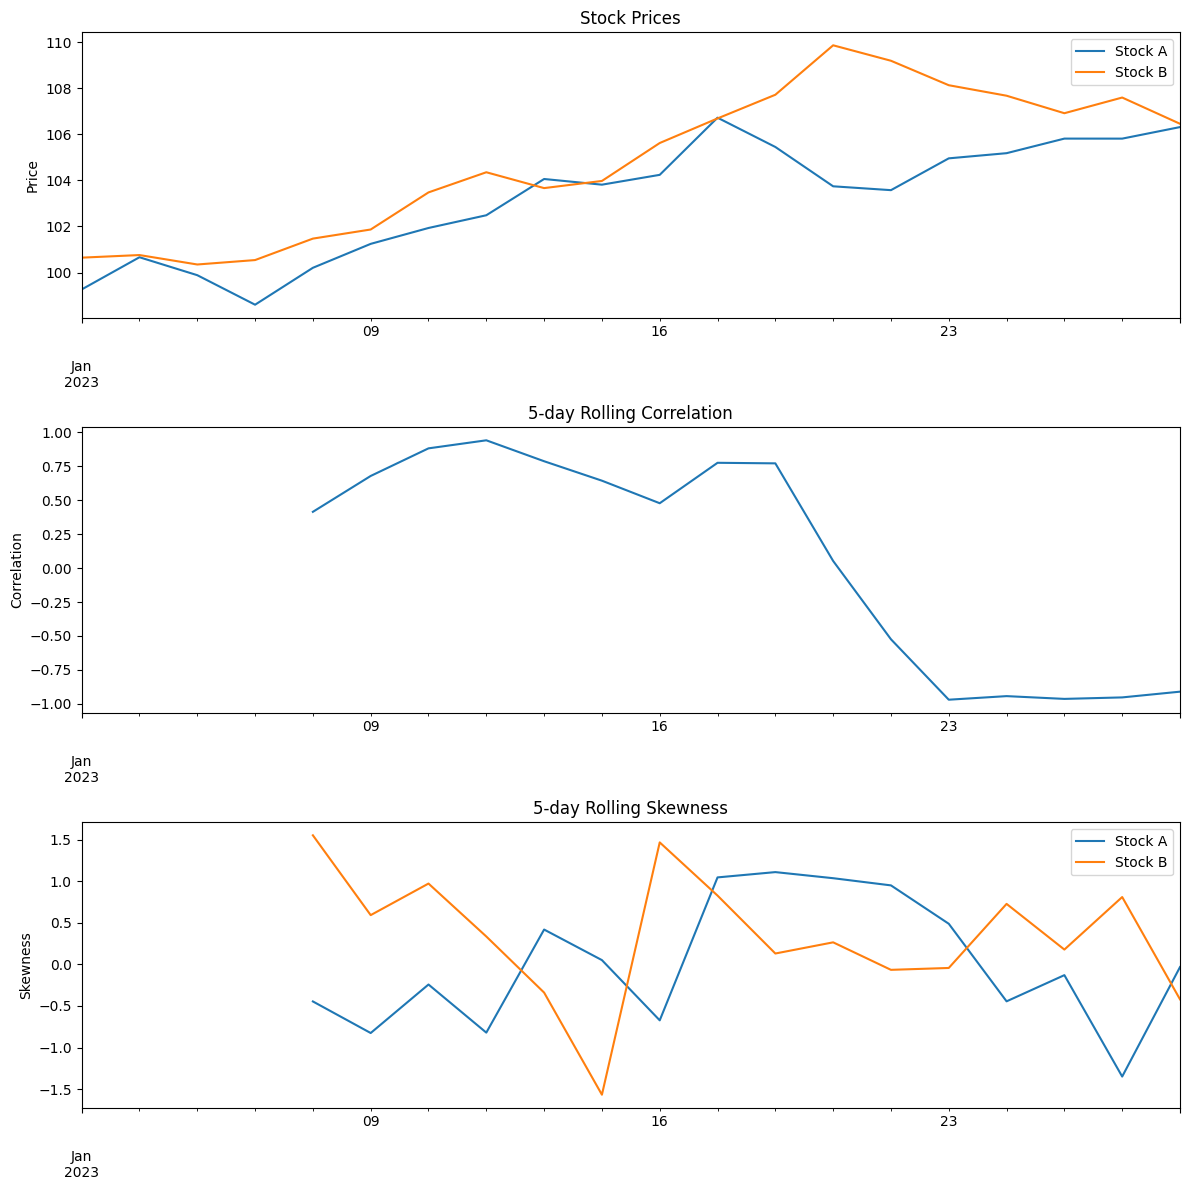

In [28]:
# Visualize the results
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot stock prices
stocks.plot(ax=axes[0], title='Stock Prices')
axes[0].set_ylabel('Price')

# Plot rolling correlation
rolling_corr.plot(ax=axes[1], title=f'{window_size}-day Rolling Correlation')
axes[1].set_ylabel('Correlation')

# Plot rolling skewness
rolling_skew_a.plot(ax=axes[2], label='Stock A')
rolling_skew_b.plot(ax=axes[2], label='Stock B')
axes[2].set_title(f'{window_size}-day Rolling Skewness')
axes[2].set_ylabel('Skewness')
axes[2].legend()

plt.tight_layout()
plt.show()